In [1]:
import os
import numpy as np
import pickle as pkl
from os.path import join as pjoin
from matplotlib import pyplot as plt, colors
from statsmodels.stats.multitest import multipletests
from cxy_visual_dev.lib.predefine import proj_dir

anal_dir = pjoin(proj_dir, 'analysis')
work_dir = pjoin(anal_dir, 'plot/plot_RSM')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

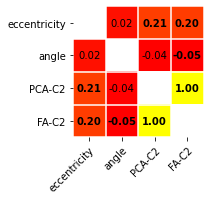

In [13]:
class MidpointNormalize(colors.Normalize):
    # https://matplotlib.org/stable/gallery/userdemo/colormap_normalizations.html
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


figsize = (3, 3)
data = pkl.load(open(pjoin(anal_dir, 'RSM/EA_C2_RSM_MMP-vis2-early3-LR_R2.pkl'), 'rb'))
out_file = pjoin(work_dir, 'EA_C2_RSM.jpg')
assert data['row_name'] == data['col_name']
n_item = len(data['row_name'])
diag_mask = np.eye(n_item, dtype=bool)
# reject, p_arr[tril_mask], alpha_sidak, alpha_bonf = \
#     multipletests(p_arr[tril_mask], 0.05, 'fdr_bh')
p_mask = data['p'] < 0.05

r_arr = np.ma.array(data['r'], mask=diag_mask)
_, ax = plt.subplots(figsize=figsize)
ticks = np.arange(n_item)
# img = ax.imshow(r_arr, 'coolwarm', norm=MidpointNormalize(midpoint=0.))
img = ax.imshow(r_arr, 'autumn')
# plt.colorbar(img)
ax.set_xticks(ticks)
ax.set_xticklabels(data['col_name'])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_yticks(ticks)
ax.set_yticklabels(data['row_name'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# plt.colorbar(img, shrink=0.5)

grid_ticks = np.r_[ticks-.5, ticks[-1]+.5]
ax.set_xticks(grid_ticks, minor=True)
ax.set_yticks(grid_ticks, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=1.5)
ax.tick_params(which="minor", bottom=False, left=False)

for i in range(n_item):
    for j in range(n_item):
        if isinstance(r_arr[i, j], np.ma.core.MaskedConstant):
            continue

        if p_mask[i, j]:
            weight = 'bold'
        else:
            weight = None

        ax.text(j, i, '{:.2f}'.format(r_arr[i, j]),
                ha="center", va="center", color="k", weight=weight)

plt.tight_layout()
if out_file is None:
    plt.show()
else:
    plt.savefig(out_file)